In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Conv1D,MaxPooling1D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
%config InlineBackend.figure_fornat = 'retina'
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',2000)

In [2]:
#read multiple file
import os
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/spectrum400pic_Xfixed/'
THz_Spectrum_list= []
for i in range(400):
    print(i)
    data = np.load(fpath + 'sepctrum' +str(i) + '.npy')
    THz_Spectrum_list.append(data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
data2 = np.load('all_processed_data.npz')
lst = data2.files
for item in lst:
    print(item)
    print(data2[item])

X
[[-0.00864469  0.0006357   0.01244438 ...  0.20125262  0.24801245
   0.22432554]
 [ 0.0018402   0.00993099  0.02183564 ...  0.37911781  0.43591616
   0.46893506]
 [ 0.13422352  0.13921366  0.14955479 ...  0.18717591  0.15615716
   0.12713   ]
 ...
 [ 0.05029795  0.06236732  0.0761603  ...  0.30991094  0.30719812
   0.26446351]
 [ 0.0201164   0.03192383  0.04508201 ...  0.27126067  0.22192419
   0.22990213]
 [ 0.01482185  0.02738802  0.04101932 ...  0.22819835  0.19387345
   0.19890692]]
y
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 ...
 [0.06008469 0.65929652 0.28061879]
 [0.34946664 0.36030602 0.29022734]
 [0.31033173 0.50012997 0.1895383 ]]


In [6]:
THz = np.array(THz_Spectrum_list)

In [7]:
y = data2['y']

In [9]:
print(THz.shape,y.shape)

(400, 64, 64) (400, 3)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pymongo
from pymongo import MongoClient
import json

In [90]:
client = MongoClient('localhost',27017)

In [5]:
X = data2['X']
y = data2['y']

In [59]:
X = data2['X']
y = data2['y']
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/Database/'
for i in range(0,4,1):
    df_X[i] = pd.DataFrame(X[i,:])
    df_X.to_json(fpath + f'Spectrum_{i}.json')

In [96]:
df_y = pd.read_json('C:/Users/HP/Desktop/Data/DataAnalysis_raman/Database/Spectrum_1.json')
df_y

,1
0,0.001840
1,0.009931
10,-0.000071
100,0.003748
101,0.000480
102,-0.001283
103,-0.004791
104,0.000030
105,-0.003421
106,-0.000336


In [70]:
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/Database/'
df_X = pd.DataFrame(X[0,:])
df_X.to_json(fpath + 'Spectrum_0.json')

In [72]:
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/Database/'
df_z = pd.DataFrame(X[1,:])
df_z.to_json(fpath + 'Spectrum_1.json')

In [6]:
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/Database/'
df_X = pd.DataFrame(X[2,:])
df_X.to_json(fpath + 'Spectrum_2.json')

In [7]:
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/Database/'
df_X = pd.DataFrame(X[3,:])
df_X.to_json(fpath + 'Spectrum_3.json')

In [5]:
X = data2['X']
y = data2['y']
df_X = pd.DataFrame(X)
df_X.iloc[0,:]

0     -0.008645
1      0.000636
2      0.012444
3      0.021545
4      0.018831
5      0.015604
6      0.016842
7      0.014596
8      0.007306
9     -0.002784
10    -0.007387
11    -0.006624
12    -0.006039
13    -0.004047
14    -0.001665
15     0.004141
16     0.008647
17     0.011609
18     0.016709
19     0.019267
20     0.020946
21     0.020572
22     0.021731
23     0.023352
24     0.019530
25     0.014034
26     0.011993
27     0.009919
28     0.008346
29     0.003005
30     0.000329
31     0.001574
32    -0.000107
33     0.000323
34     0.001203
35     0.003508
36     0.004441
37     0.008395
38     0.012683
39     0.016335
40     0.020691
41     0.023430
42     0.025380
43     0.026670
44     0.028423
45     0.027702
46     0.027902
47     0.025976
48     0.024052
49     0.023025
50     0.019586
51     0.016095
52     0.014638
53     0.012380
54     0.007930
55     0.006620
56     0.006219
57     0.004371
58     0.006164
59     0.006973
60     0.008482
61     0.013109
62     0

In [4]:
X = np.array(THz_Spectrum_list)
y = data2['y']
print(X.shape,y.shape)

(400, 64, 64) (400, 3)


In [5]:
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)
y_train = np.expand_dims(y_train, 2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#CNN

(400, 64, 64) (400, 3)
(320, 64, 64, 1) (80, 64, 64, 1) (320, 3, 1) (80, 3)


In [79]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(64,64,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3,activation='softmax'))
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 64, 64, 1) (80, 64, 64, 1) (320, 3, 1) (80, 3)


In [80]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
batch_normalization_40 (Batc (None, 62, 62, 16)        64        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
batch_normalization_41 (Batc (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6272)            

In [81]:
history = model.fit(X_train,y_train, batch_size = 1000, epochs = 3000,verbose=1,validation_split=0.33)

Epoch 1/3000
1/1 [==============================] - 0s 284ms/step - loss: 0.1561 - val_loss: 0.0981
Epoch 2/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.0996 - val_loss: 0.1057
Epoch 3/3000
1/1 [==============================] - 0s 83ms/step - loss: 0.0990 - val_loss: 0.1064
Epoch 4/3000
1/1 [==============================] - 0s 87ms/step - loss: 0.0968 - val_loss: 0.1064
Epoch 5/3000
1/1 [==============================] - 0s 83ms/step - loss: 0.0906 - val_loss: 0.1053
Epoch 6/3000
1/1 [==============================] - 0s 92ms/step - loss: 0.0903 - val_loss: 0.1048
Epoch 7/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0904 - val_loss: 0.1042
Epoch 8/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.0917 - val_loss: 0.1031
Epoch 9/3000
1/1 [==============================] - 0s 79ms/step - loss: 0.0850 - val_loss: 0.1015
Epoch 10/3000
1/1 [==============================] - 0s 84ms/step - loss: 0.0873 - val_loss: 0.0980
Epoch 11

Epoch 83/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.0421 - val_loss: 0.1248
Epoch 84/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0388 - val_loss: 0.1178
Epoch 85/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0383 - val_loss: 0.1101
Epoch 86/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.0371 - val_loss: 0.1029
Epoch 87/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.0356 - val_loss: 0.0958
Epoch 88/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0351 - val_loss: 0.0895
Epoch 89/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0368 - val_loss: 0.0842
Epoch 90/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0337 - val_loss: 0.0793
Epoch 91/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0329 - val_loss: 0.0774
Epoch 92/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0325 - val_loss: 0.0759


1/1 [==============================] - 0s 72ms/step - loss: 0.0015 - val_loss: 0.0566
Epoch 246/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.0016 - val_loss: 0.0568
Epoch 247/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.0017 - val_loss: 0.0577
Epoch 248/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0014 - val_loss: 0.0585
Epoch 249/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0015 - val_loss: 0.0587
Epoch 250/3000
1/1 [==============================] - 0s 73ms/step - loss: 0.0015 - val_loss: 0.0588
Epoch 251/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.0016 - val_loss: 0.0595
Epoch 252/3000
1/1 [==============================] - 0s 73ms/step - loss: 0.0016 - val_loss: 0.0603
Epoch 253/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.0015 - val_loss: 0.0590
Epoch 254/3000
1/1 [==============================] - 0s 73ms/step - loss: 0.0015 - val_loss: 0.0583
Epoch

Epoch 326/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.0012 - val_loss: 0.0547
Epoch 327/3000
1/1 [==============================] - 0s 87ms/step - loss: 0.0011 - val_loss: 0.0552
Epoch 328/3000
1/1 [==============================] - 0s 92ms/step - loss: 8.5229e-04 - val_loss: 0.0563
Epoch 329/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.0013 - val_loss: 0.0560
Epoch 330/3000
1/1 [==============================] - 0s 74ms/step - loss: 9.4358e-04 - val_loss: 0.0552
Epoch 331/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0010 - val_loss: 0.0556
Epoch 332/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0011 - val_loss: 0.0562
Epoch 333/3000
1/1 [==============================] - 0s 85ms/step - loss: 8.2248e-04 - val_loss: 0.0557
Epoch 334/3000
1/1 [==============================] - 0s 77ms/step - loss: 9.7896e-04 - val_loss: 0.0535
Epoch 335/3000
1/1 [==============================] - 0s 94ms/step - loss: 

1/1 [==============================] - 0s 76ms/step - loss: 6.4008e-04 - val_loss: 0.0249
Epoch 483/3000
1/1 [==============================] - 0s 74ms/step - loss: 5.7286e-04 - val_loss: 0.0236
Epoch 484/3000
1/1 [==============================] - 0s 73ms/step - loss: 6.7781e-04 - val_loss: 0.0239
Epoch 485/3000
1/1 [==============================] - 0s 74ms/step - loss: 5.3822e-04 - val_loss: 0.0237
Epoch 486/3000
1/1 [==============================] - 0s 74ms/step - loss: 6.1232e-04 - val_loss: 0.0234
Epoch 487/3000
1/1 [==============================] - 0s 76ms/step - loss: 6.0933e-04 - val_loss: 0.0238
Epoch 488/3000
1/1 [==============================] - 0s 75ms/step - loss: 5.2896e-04 - val_loss: 0.0247
Epoch 489/3000
1/1 [==============================] - 0s 81ms/step - loss: 6.5223e-04 - val_loss: 0.0250
Epoch 490/3000
1/1 [==============================] - 0s 75ms/step - loss: 5.9877e-04 - val_loss: 0.0240
Epoch 491/3000
1/1 [==============================] - 0s 71ms/step - l

1/1 [==============================] - 0s 79ms/step - loss: 4.9466e-04 - val_loss: 0.0051
Epoch 639/3000
1/1 [==============================] - 0s 77ms/step - loss: 4.3181e-04 - val_loss: 0.0051
Epoch 640/3000
1/1 [==============================] - 0s 77ms/step - loss: 5.0513e-04 - val_loss: 0.0051
Epoch 641/3000
1/1 [==============================] - 0s 79ms/step - loss: 4.3935e-04 - val_loss: 0.0054
Epoch 642/3000
1/1 [==============================] - 0s 76ms/step - loss: 4.3189e-04 - val_loss: 0.0050
Epoch 643/3000
1/1 [==============================] - 0s 75ms/step - loss: 4.7153e-04 - val_loss: 0.0046
Epoch 644/3000
1/1 [==============================] - 0s 77ms/step - loss: 5.1524e-04 - val_loss: 0.0046
Epoch 645/3000
1/1 [==============================] - 0s 79ms/step - loss: 5.2138e-04 - val_loss: 0.0050
Epoch 646/3000
1/1 [==============================] - 0s 76ms/step - loss: 4.9570e-04 - val_loss: 0.0050
Epoch 647/3000
1/1 [==============================] - 0s 78ms/step - l

1/1 [==============================] - 0s 76ms/step - loss: 3.8919e-04 - val_loss: 0.0017
Epoch 795/3000
1/1 [==============================] - 0s 79ms/step - loss: 3.4987e-04 - val_loss: 0.0018
Epoch 796/3000
1/1 [==============================] - 0s 81ms/step - loss: 3.5145e-04 - val_loss: 0.0019
Epoch 797/3000
1/1 [==============================] - 0s 78ms/step - loss: 3.6956e-04 - val_loss: 0.0019
Epoch 798/3000
1/1 [==============================] - 0s 78ms/step - loss: 3.2756e-04 - val_loss: 0.0019
Epoch 799/3000
1/1 [==============================] - 0s 84ms/step - loss: 3.4305e-04 - val_loss: 0.0019
Epoch 800/3000
1/1 [==============================] - 0s 78ms/step - loss: 4.0401e-04 - val_loss: 0.0020
Epoch 801/3000
1/1 [==============================] - 0s 82ms/step - loss: 3.3273e-04 - val_loss: 0.0019
Epoch 802/3000
1/1 [==============================] - 0s 78ms/step - loss: 3.7624e-04 - val_loss: 0.0018
Epoch 803/3000
1/1 [==============================] - 0s 76ms/step - l

1/1 [==============================] - 0s 81ms/step - loss: 2.7971e-04 - val_loss: 0.0016
Epoch 951/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.8636e-04 - val_loss: 0.0016
Epoch 952/3000
1/1 [==============================] - 0s 77ms/step - loss: 3.0570e-04 - val_loss: 0.0017
Epoch 953/3000
1/1 [==============================] - 0s 78ms/step - loss: 3.0194e-04 - val_loss: 0.0017
Epoch 954/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.6046e-04 - val_loss: 0.0017
Epoch 955/3000
1/1 [==============================] - 0s 79ms/step - loss: 2.5346e-04 - val_loss: 0.0017
Epoch 956/3000
1/1 [==============================] - 0s 80ms/step - loss: 2.8830e-04 - val_loss: 0.0017
Epoch 957/3000
1/1 [==============================] - 0s 80ms/step - loss: 2.7968e-04 - val_loss: 0.0018
Epoch 958/3000
1/1 [==============================] - 0s 82ms/step - loss: 2.9389e-04 - val_loss: 0.0017
Epoch 959/3000
1/1 [==============================] - 0s 75ms/step - l

Epoch 1028/3000
1/1 [==============================] - 0s 77ms/step - loss: 3.3591e-04 - val_loss: 0.0017
Epoch 1029/3000
1/1 [==============================] - 0s 78ms/step - loss: 3.3181e-04 - val_loss: 0.0017
Epoch 1030/3000
1/1 [==============================] - 0s 84ms/step - loss: 3.1811e-04 - val_loss: 0.0017
Epoch 1031/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.9381e-04 - val_loss: 0.0016
Epoch 1032/3000
1/1 [==============================] - 0s 74ms/step - loss: 2.8324e-04 - val_loss: 0.0017
Epoch 1033/3000
1/1 [==============================] - 0s 74ms/step - loss: 2.7169e-04 - val_loss: 0.0018
Epoch 1034/3000
1/1 [==============================] - 0s 76ms/step - loss: 3.5570e-04 - val_loss: 0.0016
Epoch 1035/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.4267e-04 - val_loss: 0.0017
Epoch 1036/3000
1/1 [==============================] - 0s 76ms/step - loss: 3.3790e-04 - val_loss: 0.0017
Epoch 1037/3000
1/1 [=========================

1/1 [==============================] - 0s 79ms/step - loss: 2.8173e-04 - val_loss: 0.0017
Epoch 1183/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.6056e-04 - val_loss: 0.0018
Epoch 1184/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.6017e-04 - val_loss: 0.0018
Epoch 1185/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.3613e-04 - val_loss: 0.0018
Epoch 1186/3000
1/1 [==============================] - 0s 86ms/step - loss: 2.1710e-04 - val_loss: 0.0018
Epoch 1187/3000
1/1 [==============================] - 0s 81ms/step - loss: 3.2219e-04 - val_loss: 0.0017
Epoch 1188/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.4889e-04 - val_loss: 0.0017
Epoch 1189/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.9797e-04 - val_loss: 0.0017
Epoch 1190/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.5900e-04 - val_loss: 0.0017
Epoch 1191/3000
1/1 [==============================] - 0s 77ms

1/1 [==============================] - 0s 78ms/step - loss: 2.5942e-04 - val_loss: 0.0016
Epoch 1337/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.3943e-04 - val_loss: 0.0019
Epoch 1338/3000
1/1 [==============================] - 0s 84ms/step - loss: 2.8789e-04 - val_loss: 0.0018
Epoch 1339/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.8251e-04 - val_loss: 0.0016
Epoch 1340/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.8669e-04 - val_loss: 0.0016
Epoch 1341/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.6978e-04 - val_loss: 0.0017
Epoch 1342/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.8749e-04 - val_loss: 0.0017
Epoch 1343/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.8166e-04 - val_loss: 0.0017
Epoch 1344/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.2522e-04 - val_loss: 0.0017
Epoch 1345/3000
1/1 [==============================] - 0s 77ms

1/1 [==============================] - 0s 76ms/step - loss: 2.6078e-04 - val_loss: 0.0017
Epoch 1491/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.4643e-04 - val_loss: 0.0017
Epoch 1492/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.3179e-04 - val_loss: 0.0017
Epoch 1493/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.2476e-04 - val_loss: 0.0017
Epoch 1494/3000
1/1 [==============================] - 0s 75ms/step - loss: 1.9496e-04 - val_loss: 0.0017
Epoch 1495/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.0273e-04 - val_loss: 0.0017
Epoch 1496/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.4280e-04 - val_loss: 0.0016
Epoch 1497/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.3592e-04 - val_loss: 0.0017
Epoch 1498/3000
1/1 [==============================] - 0s 75ms/step - loss: 1.9828e-04 - val_loss: 0.0017
Epoch 1499/3000
1/1 [==============================] - 0s 76ms

1/1 [==============================] - 0s 78ms/step - loss: 2.5290e-04 - val_loss: 0.0017
Epoch 1645/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.3493e-04 - val_loss: 0.0017
Epoch 1646/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.2680e-04 - val_loss: 0.0017
Epoch 1647/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.5260e-04 - val_loss: 0.0017
Epoch 1648/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.3076e-04 - val_loss: 0.0016
Epoch 1649/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.2721e-04 - val_loss: 0.0016
Epoch 1650/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.3673e-04 - val_loss: 0.0016
Epoch 1651/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.2811e-04 - val_loss: 0.0017
Epoch 1652/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.8061e-04 - val_loss: 0.0016
Epoch 1653/3000
1/1 [==============================] - 0s 75ms

1/1 [==============================] - 0s 81ms/step - loss: 2.0646e-04 - val_loss: 0.0017
Epoch 1799/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.4065e-04 - val_loss: 0.0018
Epoch 1800/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.4254e-04 - val_loss: 0.0017
Epoch 1801/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.0298e-04 - val_loss: 0.0017
Epoch 1802/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.0602e-04 - val_loss: 0.0019
Epoch 1803/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.2857e-04 - val_loss: 0.0019
Epoch 1804/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.0939e-04 - val_loss: 0.0018
Epoch 1805/3000
1/1 [==============================] - 0s 79ms/step - loss: 2.0627e-04 - val_loss: 0.0017
Epoch 1806/3000
1/1 [==============================] - 0s 76ms/step - loss: 1.8431e-04 - val_loss: 0.0017
Epoch 1807/3000
1/1 [==============================] - 0s 76ms

1/1 [==============================] - 0s 76ms/step - loss: 2.7478e-04 - val_loss: 0.0018
Epoch 1953/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.1742e-04 - val_loss: 0.0018
Epoch 1954/3000
1/1 [==============================] - 0s 80ms/step - loss: 2.5711e-04 - val_loss: 0.0019
Epoch 1955/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.7545e-04 - val_loss: 0.0019
Epoch 1956/3000
1/1 [==============================] - 0s 77ms/step - loss: 1.7736e-04 - val_loss: 0.0019
Epoch 1957/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.5987e-04 - val_loss: 0.0018
Epoch 1958/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.3533e-04 - val_loss: 0.0017
Epoch 1959/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.1435e-04 - val_loss: 0.0017
Epoch 1960/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.1193e-04 - val_loss: 0.0017
Epoch 1961/3000
1/1 [==============================] - 0s 77ms

1/1 [==============================] - 0s 76ms/step - loss: 2.6659e-04 - val_loss: 0.0019
Epoch 2107/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.8188e-04 - val_loss: 0.0019
Epoch 2108/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.7372e-04 - val_loss: 0.0018
Epoch 2109/3000
1/1 [==============================] - 0s 75ms/step - loss: 3.1700e-04 - val_loss: 0.0017
Epoch 2110/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.7269e-04 - val_loss: 0.0021
Epoch 2111/3000
1/1 [==============================] - 0s 76ms/step - loss: 3.3099e-04 - val_loss: 0.0018
Epoch 2112/3000
1/1 [==============================] - 0s 80ms/step - loss: 2.1188e-04 - val_loss: 0.0017
Epoch 2113/3000
1/1 [==============================] - 0s 78ms/step - loss: 4.2411e-04 - val_loss: 0.0017
Epoch 2114/3000
1/1 [==============================] - 0s 79ms/step - loss: 2.2329e-04 - val_loss: 0.0021
Epoch 2115/3000
1/1 [==============================] - 0s 82ms

1/1 [==============================] - 0s 76ms/step - loss: 2.8405e-04 - val_loss: 0.0016
Epoch 2261/3000
1/1 [==============================] - 0s 78ms/step - loss: 2.0327e-04 - val_loss: 0.0018
Epoch 2262/3000
1/1 [==============================] - 0s 80ms/step - loss: 2.0750e-04 - val_loss: 0.0018
Epoch 2263/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.3066e-04 - val_loss: 0.0016
Epoch 2264/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.5713e-04 - val_loss: 0.0016
Epoch 2265/3000
1/1 [==============================] - 0s 75ms/step - loss: 2.3911e-04 - val_loss: 0.0017
Epoch 2266/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.4221e-04 - val_loss: 0.0017
Epoch 2267/3000
1/1 [==============================] - 0s 77ms/step - loss: 1.5923e-04 - val_loss: 0.0017
Epoch 2268/3000
1/1 [==============================] - 0s 76ms/step - loss: 1.7455e-04 - val_loss: 0.0018
Epoch 2269/3000
1/1 [==============================] - 0s 85ms

1/1 [==============================] - 0s 90ms/step - loss: 1.8122e-04 - val_loss: 0.0017
Epoch 2415/3000
1/1 [==============================] - 0s 78ms/step - loss: 1.4093e-04 - val_loss: 0.0017
Epoch 2416/3000
1/1 [==============================] - 0s 143ms/step - loss: 1.9590e-04 - val_loss: 0.0017
Epoch 2417/3000
1/1 [==============================] - 0s 85ms/step - loss: 1.5613e-04 - val_loss: 0.0017
Epoch 2418/3000
1/1 [==============================] - 0s 101ms/step - loss: 1.8562e-04 - val_loss: 0.0018
Epoch 2419/3000
1/1 [==============================] - 0s 97ms/step - loss: 1.6249e-04 - val_loss: 0.0017
Epoch 2420/3000
1/1 [==============================] - 0s 86ms/step - loss: 1.6673e-04 - val_loss: 0.0017
Epoch 2421/3000
1/1 [==============================] - 0s 87ms/step - loss: 1.5490e-04 - val_loss: 0.0017
Epoch 2422/3000
1/1 [==============================] - 0s 87ms/step - loss: 1.5650e-04 - val_loss: 0.0018
Epoch 2423/3000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 75ms/step - loss: 2.2249e-04 - val_loss: 0.0018
Epoch 2569/3000
1/1 [==============================] - 0s 78ms/step - loss: 1.3323e-04 - val_loss: 0.0019
Epoch 2570/3000
1/1 [==============================] - 0s 73ms/step - loss: 1.5472e-04 - val_loss: 0.0018
Epoch 2571/3000
1/1 [==============================] - 0s 75ms/step - loss: 1.2256e-04 - val_loss: 0.0017
Epoch 2572/3000
1/1 [==============================] - 0s 72ms/step - loss: 1.4689e-04 - val_loss: 0.0017
Epoch 2573/3000
1/1 [==============================] - 0s 78ms/step - loss: 1.8410e-04 - val_loss: 0.0017
Epoch 2574/3000
1/1 [==============================] - 0s 73ms/step - loss: 1.4130e-04 - val_loss: 0.0018
Epoch 2575/3000
1/1 [==============================] - 0s 74ms/step - loss: 1.9229e-04 - val_loss: 0.0018
Epoch 2576/3000
1/1 [==============================] - 0s 71ms/step - loss: 1.5337e-04 - val_loss: 0.0018
Epoch 2577/3000
1/1 [==============================] - 0s 72ms

1/1 [==============================] - 0s 72ms/step - loss: 1.6600e-04 - val_loss: 0.0020
Epoch 2723/3000
1/1 [==============================] - 0s 74ms/step - loss: 1.5376e-04 - val_loss: 0.0019
Epoch 2724/3000
1/1 [==============================] - 0s 73ms/step - loss: 2.0286e-04 - val_loss: 0.0020
Epoch 2725/3000
1/1 [==============================] - 0s 71ms/step - loss: 2.0389e-04 - val_loss: 0.0019
Epoch 2726/3000
1/1 [==============================] - 0s 78ms/step - loss: 1.4816e-04 - val_loss: 0.0020
Epoch 2727/3000
1/1 [==============================] - 0s 74ms/step - loss: 2.3182e-04 - val_loss: 0.0019
Epoch 2728/3000
1/1 [==============================] - 0s 74ms/step - loss: 1.7154e-04 - val_loss: 0.0019
Epoch 2729/3000
1/1 [==============================] - 0s 77ms/step - loss: 2.2529e-04 - val_loss: 0.0019
Epoch 2730/3000
1/1 [==============================] - 0s 75ms/step - loss: 1.5348e-04 - val_loss: 0.0019
Epoch 2731/3000
1/1 [==============================] - 0s 75ms

1/1 [==============================] - 0s 89ms/step - loss: 2.7530e-04 - val_loss: 0.0019
Epoch 2877/3000
1/1 [==============================] - 0s 103ms/step - loss: 1.3548e-04 - val_loss: 0.0020
Epoch 2878/3000
1/1 [==============================] - 0s 94ms/step - loss: 2.4793e-04 - val_loss: 0.0020
Epoch 2879/3000
1/1 [==============================] - 0s 86ms/step - loss: 2.1678e-04 - val_loss: 0.0019
Epoch 2880/3000
1/1 [==============================] - 0s 96ms/step - loss: 2.5459e-04 - val_loss: 0.0018
Epoch 2881/3000
1/1 [==============================] - 0s 91ms/step - loss: 1.9387e-04 - val_loss: 0.0019
Epoch 2882/3000
1/1 [==============================] - 0s 92ms/step - loss: 2.1116e-04 - val_loss: 0.0021
Epoch 2883/3000
1/1 [==============================] - 0s 86ms/step - loss: 1.8589e-04 - val_loss: 0.0020
Epoch 2884/3000
1/1 [==============================] - 0s 81ms/step - loss: 1.9996e-04 - val_loss: 0.0018
Epoch 2885/3000
1/1 [==============================] - 0s 93m

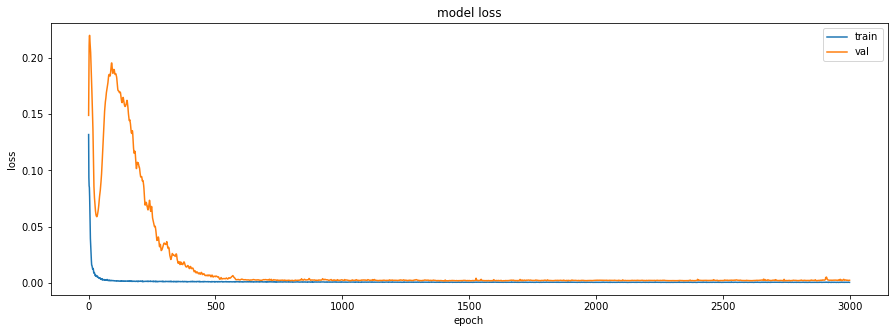

In [51]:
#softplus
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

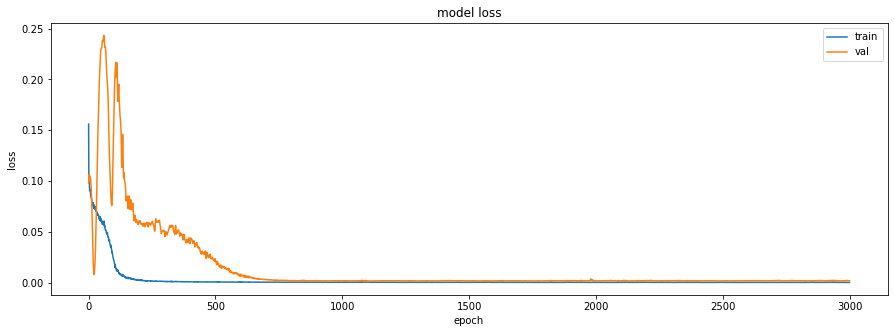

In [84]:
#test2
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

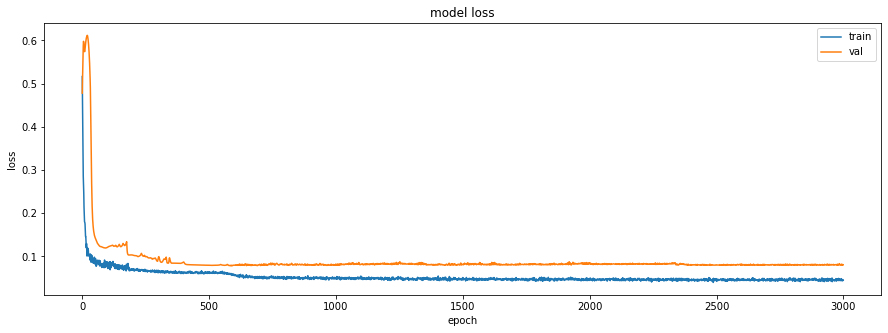

In [108]:
#test3
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [82]:
y_pred = model.predict(X_test)

In [72]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plot
from numpy import asarray
from numpy import unique
from numpy import argmax
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [56]:
m = mean_squared_error(y_test,y_pred)
r = math.sqrt(m)
print('MSE = ',m)
print('RMSE = ',r)

MSE =  0.0013776992485653795
RMSE =  0.037117371250741604


In [83]:
m = mean_squared_error(y_test,y_pred)
r = math.sqrt(m)
print('MSE = ',m)
print('RMSE = ',r)

MSE =  0.001583335118952987
RMSE =  0.03979114372511787


### MLP

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = X_train.reshape(320, 64*64)
X_test = X_test.reshape(80, 64*64)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 4096) (80, 4096) (320, 3) (80, 3)


In [39]:
model1 = Sequential()
model1.add(Dense(2048, activation='relu', input_shape=(4096,)))
model1.add(BatchNormalization())
model1.add(Dense(512,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(32,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(3,activation='softmax'))
model1.compile(loss='mse', 
         optimizer='adam',metrics=['accuracy'])        

In [16]:
model1 = Sequential()
model1.add(Dense(2048, activation='relu', input_shape=(4096,)))
model1.add(BatchNormalization())
model1.add(Dense(102,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(512,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(64,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dense(3,activation='softmax'))
model1.compile(loss='mse', 
         optimizer='adam',metrics=['accuracy'])    

In [40]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
batch_normalization_24 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_33 (Dense)             (None, 512)               1049088   
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                16416     
_________________________________________________________________
batch_normalization_26 (Batc (None, 32)                128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)               

In [32]:
history1 = model1.fit(X_train,y_train, batch_size = 1000, epochs = 3000,verbose=1,validation_split=0.33)

Epoch 1/3000
1/1 [==============================] - 0s 285ms/step - loss: 0.1248 - accuracy: 0.4299 - val_loss: 0.1100 - val_accuracy: 0.6132
Epoch 2/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.0894 - accuracy: 0.8131 - val_loss: 0.1659 - val_accuracy: 0.3962
Epoch 3/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.0954 - accuracy: 0.7897 - val_loss: 0.2141 - val_accuracy: 0.3585
Epoch 4/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0892 - accuracy: 0.8364 - val_loss: 0.2037 - val_accuracy: 0.3585
Epoch 5/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.0888 - accuracy: 0.8178 - val_loss: 0.2010 - val_accuracy: 0.3585
Epoch 6/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.0917 - accuracy: 0.8224 - val_loss: 0.1751 - val_accuracy: 0.3585
Epoch 7/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.0896 - accuracy: 0.8224 - val_loss: 0.1169 - val_accuracy: 0.4151
Epoch 8/3000

Epoch 59/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.0424 - accuracy: 0.7944 - val_loss: 0.0329 - val_accuracy: 0.7358
Epoch 60/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.0426 - accuracy: 0.7804 - val_loss: 0.0345 - val_accuracy: 0.7075
Epoch 61/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.0432 - accuracy: 0.7383 - val_loss: 0.0353 - val_accuracy: 0.6792
Epoch 62/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.0364 - accuracy: 0.7196 - val_loss: 0.0346 - val_accuracy: 0.6887
Epoch 63/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.0328 - accuracy: 0.7523 - val_loss: 0.0357 - val_accuracy: 0.6981
Epoch 64/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.0310 - accuracy: 0.7477 - val_loss: 0.0363 - val_accuracy: 0.6981
Epoch 65/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0318 - accuracy: 0.7383 - val_loss: 0.0375 - val_accuracy: 0.7170
Epoch 

1/1 [==============================] - 0s 35ms/step - loss: 0.0078 - accuracy: 0.8037 - val_loss: 0.0579 - val_accuracy: 0.6038
Epoch 174/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.0089 - accuracy: 0.7991 - val_loss: 0.0554 - val_accuracy: 0.6038
Epoch 175/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0077 - accuracy: 0.7804 - val_loss: 0.0526 - val_accuracy: 0.6226
Epoch 176/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0079 - accuracy: 0.7897 - val_loss: 0.0499 - val_accuracy: 0.6415
Epoch 177/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.0082 - accuracy: 0.7757 - val_loss: 0.0484 - val_accuracy: 0.6415
Epoch 178/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0076 - accuracy: 0.7757 - val_loss: 0.0480 - val_accuracy: 0.6415
Epoch 179/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0082 - accuracy: 0.7570 - val_loss: 0.0488 - val_accuracy: 0.6415
Epoch 180/3000

1/1 [==============================] - 0s 37ms/step - loss: 0.0022 - accuracy: 0.8738 - val_loss: 0.0131 - val_accuracy: 0.8491
Epoch 288/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.0021 - accuracy: 0.8551 - val_loss: 0.0131 - val_accuracy: 0.8396
Epoch 289/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.0023 - accuracy: 0.8131 - val_loss: 0.0131 - val_accuracy: 0.8302
Epoch 290/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0025 - accuracy: 0.8505 - val_loss: 0.0133 - val_accuracy: 0.8208
Epoch 291/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.0024 - accuracy: 0.8411 - val_loss: 0.0134 - val_accuracy: 0.8208
Epoch 292/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.0023 - accuracy: 0.8364 - val_loss: 0.0135 - val_accuracy: 0.8208
Epoch 293/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.0020 - accuracy: 0.8505 - val_loss: 0.0136 - val_accuracy: 0.8302
Epoch 294/3000

1/1 [==============================] - 0s 37ms/step - loss: 9.2122e-04 - accuracy: 0.8598 - val_loss: 0.0050 - val_accuracy: 0.8962
Epoch 402/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.0010 - accuracy: 0.9019 - val_loss: 0.0051 - val_accuracy: 0.8962
Epoch 403/3000
1/1 [==============================] - 0s 46ms/step - loss: 9.3944e-04 - accuracy: 0.8832 - val_loss: 0.0051 - val_accuracy: 0.8962
Epoch 404/3000
1/1 [==============================] - 0s 42ms/step - loss: 8.3237e-04 - accuracy: 0.8505 - val_loss: 0.0051 - val_accuracy: 0.8962
Epoch 405/3000
1/1 [==============================] - 0s 45ms/step - loss: 9.3351e-04 - accuracy: 0.9065 - val_loss: 0.0050 - val_accuracy: 0.8774
Epoch 406/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0010 - accuracy: 0.8738 - val_loss: 0.0049 - val_accuracy: 0.8868
Epoch 407/3000
1/1 [==============================] - 0s 35ms/step - loss: 9.0468e-04 - accuracy: 0.8411 - val_loss: 0.0047 - val_accuracy: 0

Epoch 457/3000
1/1 [==============================] - 0s 38ms/step - loss: 6.2552e-04 - accuracy: 0.9486 - val_loss: 0.0037 - val_accuracy: 0.9057
Epoch 458/3000
1/1 [==============================] - 0s 35ms/step - loss: 6.2442e-04 - accuracy: 0.8785 - val_loss: 0.0036 - val_accuracy: 0.8962
Epoch 459/3000
1/1 [==============================] - 0s 39ms/step - loss: 6.8710e-04 - accuracy: 0.8738 - val_loss: 0.0035 - val_accuracy: 0.8868
Epoch 460/3000
1/1 [==============================] - 0s 38ms/step - loss: 8.1747e-04 - accuracy: 0.8879 - val_loss: 0.0035 - val_accuracy: 0.8868
Epoch 461/3000
1/1 [==============================] - 0s 42ms/step - loss: 6.7453e-04 - accuracy: 0.8925 - val_loss: 0.0035 - val_accuracy: 0.8962
Epoch 462/3000
1/1 [==============================] - 0s 41ms/step - loss: 6.4172e-04 - accuracy: 0.8738 - val_loss: 0.0035 - val_accuracy: 0.8868
Epoch 463/3000
1/1 [==============================] - 0s 39ms/step - loss: 6.8299e-04 - accuracy: 0.9065 - val_loss: 0

Epoch 513/3000
1/1 [==============================] - 0s 36ms/step - loss: 4.9301e-04 - accuracy: 0.8972 - val_loss: 0.0032 - val_accuracy: 0.8679
Epoch 514/3000
1/1 [==============================] - 0s 42ms/step - loss: 4.8498e-04 - accuracy: 0.8505 - val_loss: 0.0032 - val_accuracy: 0.8868
Epoch 515/3000
1/1 [==============================] - 0s 38ms/step - loss: 5.8351e-04 - accuracy: 0.8972 - val_loss: 0.0032 - val_accuracy: 0.8962
Epoch 516/3000
1/1 [==============================] - 0s 35ms/step - loss: 5.4266e-04 - accuracy: 0.8925 - val_loss: 0.0032 - val_accuracy: 0.9057
Epoch 517/3000
1/1 [==============================] - 0s 37ms/step - loss: 4.7523e-04 - accuracy: 0.9065 - val_loss: 0.0031 - val_accuracy: 0.9057
Epoch 518/3000
1/1 [==============================] - 0s 40ms/step - loss: 5.6750e-04 - accuracy: 0.8832 - val_loss: 0.0031 - val_accuracy: 0.9057
Epoch 519/3000
1/1 [==============================] - 0s 42ms/step - loss: 5.0417e-04 - accuracy: 0.9019 - val_loss: 0

Epoch 569/3000
1/1 [==============================] - 0s 34ms/step - loss: 4.7038e-04 - accuracy: 0.8832 - val_loss: 0.0028 - val_accuracy: 0.8868
Epoch 570/3000
1/1 [==============================] - 0s 40ms/step - loss: 4.7980e-04 - accuracy: 0.8785 - val_loss: 0.0028 - val_accuracy: 0.9057
Epoch 571/3000
1/1 [==============================] - 0s 39ms/step - loss: 4.6628e-04 - accuracy: 0.8832 - val_loss: 0.0027 - val_accuracy: 0.9151
Epoch 572/3000
1/1 [==============================] - 0s 45ms/step - loss: 4.4080e-04 - accuracy: 0.8738 - val_loss: 0.0027 - val_accuracy: 0.9151
Epoch 573/3000
1/1 [==============================] - 0s 41ms/step - loss: 4.7802e-04 - accuracy: 0.8551 - val_loss: 0.0027 - val_accuracy: 0.8962
Epoch 574/3000
1/1 [==============================] - 0s 42ms/step - loss: 4.8272e-04 - accuracy: 0.8879 - val_loss: 0.0028 - val_accuracy: 0.8868
Epoch 575/3000
1/1 [==============================] - 0s 43ms/step - loss: 4.5460e-04 - accuracy: 0.8972 - val_loss: 0

Epoch 625/3000
1/1 [==============================] - 0s 34ms/step - loss: 3.9108e-04 - accuracy: 0.8785 - val_loss: 0.0026 - val_accuracy: 0.9057
Epoch 626/3000
1/1 [==============================] - 0s 34ms/step - loss: 4.2994e-04 - accuracy: 0.9019 - val_loss: 0.0026 - val_accuracy: 0.9057
Epoch 627/3000
1/1 [==============================] - 0s 33ms/step - loss: 3.8616e-04 - accuracy: 0.8925 - val_loss: 0.0025 - val_accuracy: 0.9057
Epoch 628/3000
1/1 [==============================] - 0s 33ms/step - loss: 3.8674e-04 - accuracy: 0.9019 - val_loss: 0.0025 - val_accuracy: 0.9057
Epoch 629/3000
1/1 [==============================] - 0s 33ms/step - loss: 4.0156e-04 - accuracy: 0.8925 - val_loss: 0.0024 - val_accuracy: 0.8774
Epoch 630/3000
1/1 [==============================] - 0s 32ms/step - loss: 4.0759e-04 - accuracy: 0.8879 - val_loss: 0.0024 - val_accuracy: 0.8774
Epoch 631/3000
1/1 [==============================] - 0s 34ms/step - loss: 3.4780e-04 - accuracy: 0.8738 - val_loss: 0

Epoch 681/3000
1/1 [==============================] - 0s 41ms/step - loss: 4.0207e-04 - accuracy: 0.8832 - val_loss: 0.0023 - val_accuracy: 0.8962
Epoch 682/3000
1/1 [==============================] - 0s 45ms/step - loss: 3.4598e-04 - accuracy: 0.8738 - val_loss: 0.0023 - val_accuracy: 0.9057
Epoch 683/3000
1/1 [==============================] - 0s 46ms/step - loss: 3.3354e-04 - accuracy: 0.9252 - val_loss: 0.0023 - val_accuracy: 0.8962
Epoch 684/3000
1/1 [==============================] - 0s 43ms/step - loss: 3.8234e-04 - accuracy: 0.8738 - val_loss: 0.0024 - val_accuracy: 0.9057
Epoch 685/3000
1/1 [==============================] - 0s 43ms/step - loss: 3.2272e-04 - accuracy: 0.8972 - val_loss: 0.0023 - val_accuracy: 0.9151
Epoch 686/3000
1/1 [==============================] - 0s 38ms/step - loss: 3.0976e-04 - accuracy: 0.8785 - val_loss: 0.0023 - val_accuracy: 0.9057
Epoch 687/3000
1/1 [==============================] - 0s 51ms/step - loss: 3.5132e-04 - accuracy: 0.8692 - val_loss: 0

Epoch 737/3000
1/1 [==============================] - 0s 44ms/step - loss: 2.9393e-04 - accuracy: 0.8972 - val_loss: 0.0022 - val_accuracy: 0.9151
Epoch 738/3000
1/1 [==============================] - 0s 46ms/step - loss: 3.1466e-04 - accuracy: 0.8972 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 739/3000
1/1 [==============================] - 0s 43ms/step - loss: 3.3142e-04 - accuracy: 0.9019 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 740/3000
1/1 [==============================] - 0s 43ms/step - loss: 3.3813e-04 - accuracy: 0.8738 - val_loss: 0.0022 - val_accuracy: 0.8774
Epoch 741/3000
1/1 [==============================] - 0s 36ms/step - loss: 3.3341e-04 - accuracy: 0.8645 - val_loss: 0.0023 - val_accuracy: 0.8774
Epoch 742/3000
1/1 [==============================] - 0s 33ms/step - loss: 3.3804e-04 - accuracy: 0.8692 - val_loss: 0.0023 - val_accuracy: 0.8868
Epoch 743/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.7645e-04 - accuracy: 0.8972 - val_loss: 0

Epoch 793/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.6008e-04 - accuracy: 0.8785 - val_loss: 0.0048 - val_accuracy: 0.8396
Epoch 794/3000
1/1 [==============================] - 0s 33ms/step - loss: 3.2992e-04 - accuracy: 0.8879 - val_loss: 0.0047 - val_accuracy: 0.8396
Epoch 795/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.7951e-04 - accuracy: 0.9159 - val_loss: 0.0046 - val_accuracy: 0.8396
Epoch 796/3000
1/1 [==============================] - 0s 33ms/step - loss: 3.4172e-04 - accuracy: 0.8832 - val_loss: 0.0044 - val_accuracy: 0.8491
Epoch 797/3000
1/1 [==============================] - 0s 40ms/step - loss: 3.1548e-04 - accuracy: 0.8692 - val_loss: 0.0041 - val_accuracy: 0.8585
Epoch 798/3000
1/1 [==============================] - 0s 49ms/step - loss: 2.7889e-04 - accuracy: 0.8925 - val_loss: 0.0039 - val_accuracy: 0.8585
Epoch 799/3000
1/1 [==============================] - 0s 41ms/step - loss: 3.6769e-04 - accuracy: 0.9206 - val_loss: 0

Epoch 849/3000
1/1 [==============================] - 0s 40ms/step - loss: 2.5963e-04 - accuracy: 0.9346 - val_loss: 0.0023 - val_accuracy: 0.8679
Epoch 850/3000
1/1 [==============================] - 0s 40ms/step - loss: 2.7718e-04 - accuracy: 0.9159 - val_loss: 0.0023 - val_accuracy: 0.8774
Epoch 851/3000
1/1 [==============================] - 0s 40ms/step - loss: 2.9084e-04 - accuracy: 0.9019 - val_loss: 0.0023 - val_accuracy: 0.8868
Epoch 852/3000
1/1 [==============================] - 0s 37ms/step - loss: 2.7126e-04 - accuracy: 0.8832 - val_loss: 0.0023 - val_accuracy: 0.8868
Epoch 853/3000
1/1 [==============================] - 0s 40ms/step - loss: 2.5516e-04 - accuracy: 0.8832 - val_loss: 0.0023 - val_accuracy: 0.8774
Epoch 854/3000
1/1 [==============================] - 0s 41ms/step - loss: 3.2248e-04 - accuracy: 0.9019 - val_loss: 0.0023 - val_accuracy: 0.8679
Epoch 855/3000
1/1 [==============================] - 0s 37ms/step - loss: 3.0823e-04 - accuracy: 0.9159 - val_loss: 0

Epoch 905/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.2688e-04 - accuracy: 0.8785 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 906/3000
1/1 [==============================] - 0s 32ms/step - loss: 2.2393e-04 - accuracy: 0.8925 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 907/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.7243e-04 - accuracy: 0.9159 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 908/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.3204e-04 - accuracy: 0.8785 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 909/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.1344e-04 - accuracy: 0.8925 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 910/3000
1/1 [==============================] - 0s 33ms/step - loss: 2.7509e-04 - accuracy: 0.9299 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 911/3000
1/1 [==============================] - 0s 35ms/step - loss: 2.6086e-04 - accuracy: 0.9065 - val_loss: 0

Epoch 961/3000
1/1 [==============================] - 0s 38ms/step - loss: 2.3903e-04 - accuracy: 0.9019 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 962/3000
1/1 [==============================] - 0s 44ms/step - loss: 2.6747e-04 - accuracy: 0.8925 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 963/3000
1/1 [==============================] - 0s 41ms/step - loss: 2.2849e-04 - accuracy: 0.9065 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 964/3000
1/1 [==============================] - 0s 40ms/step - loss: 2.5088e-04 - accuracy: 0.9065 - val_loss: 0.0021 - val_accuracy: 0.8774
Epoch 965/3000
1/1 [==============================] - 0s 41ms/step - loss: 2.2821e-04 - accuracy: 0.8972 - val_loss: 0.0021 - val_accuracy: 0.8774
Epoch 966/3000
1/1 [==============================] - 0s 38ms/step - loss: 2.3072e-04 - accuracy: 0.8972 - val_loss: 0.0021 - val_accuracy: 0.8774
Epoch 967/3000
1/1 [==============================] - 0s 41ms/step - loss: 2.4040e-04 - accuracy: 0.9019 - val_loss: 0

1/1 [==============================] - 0s 36ms/step - loss: 2.3386e-04 - accuracy: 0.8692 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 1072/3000
1/1 [==============================] - 0s 37ms/step - loss: 2.4232e-04 - accuracy: 0.9206 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1073/3000
1/1 [==============================] - 0s 45ms/step - loss: 2.4210e-04 - accuracy: 0.8879 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 1074/3000
1/1 [==============================] - 0s 47ms/step - loss: 2.3256e-04 - accuracy: 0.8925 - val_loss: 0.0022 - val_accuracy: 0.9057
Epoch 1075/3000
1/1 [==============================] - 0s 42ms/step - loss: 2.5373e-04 - accuracy: 0.8972 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 1076/3000
1/1 [==============================] - 0s 48ms/step - loss: 2.3254e-04 - accuracy: 0.9206 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 1077/3000
1/1 [==============================] - 0s 40ms/step - loss: 2.3846e-04 - accuracy: 0.8785 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 36ms/step - loss: 2.4468e-04 - accuracy: 0.9112 - val_loss: 0.0033 - val_accuracy: 0.8396
Epoch 1182/3000
1/1 [==============================] - 0s 42ms/step - loss: 2.0158e-04 - accuracy: 0.9159 - val_loss: 0.0033 - val_accuracy: 0.8585
Epoch 1183/3000
1/1 [==============================] - 0s 42ms/step - loss: 1.8561e-04 - accuracy: 0.8925 - val_loss: 0.0032 - val_accuracy: 0.8585
Epoch 1184/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.9788e-04 - accuracy: 0.9019 - val_loss: 0.0031 - val_accuracy: 0.8585
Epoch 1185/3000
1/1 [==============================] - 0s 39ms/step - loss: 1.9322e-04 - accuracy: 0.9206 - val_loss: 0.0031 - val_accuracy: 0.8585
Epoch 1186/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.8961e-04 - accuracy: 0.9112 - val_loss: 0.0031 - val_accuracy: 0.8585
Epoch 1187/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.1164e-04 - accuracy: 0.9206 - val_loss: 0.0031 - v

1/1 [==============================] - 0s 33ms/step - loss: 1.9429e-04 - accuracy: 0.8598 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1292/3000
1/1 [==============================] - 0s 38ms/step - loss: 2.0388e-04 - accuracy: 0.9299 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1293/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.1816e-04 - accuracy: 0.8972 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1294/3000
1/1 [==============================] - 0s 37ms/step - loss: 2.0629e-04 - accuracy: 0.9112 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1295/3000
1/1 [==============================] - 0s 38ms/step - loss: 2.2450e-04 - accuracy: 0.9112 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1296/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.8418e-04 - accuracy: 0.8925 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 1297/3000
1/1 [==============================] - 0s 41ms/step - loss: 2.0196e-04 - accuracy: 0.9019 - val_loss: 0.0021 - v

1/1 [==============================] - 0s 32ms/step - loss: 1.9077e-04 - accuracy: 0.8879 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1402/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.6924e-04 - accuracy: 0.8598 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1403/3000
1/1 [==============================] - 0s 33ms/step - loss: 2.0842e-04 - accuracy: 0.8972 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1404/3000
1/1 [==============================] - 0s 32ms/step - loss: 2.0204e-04 - accuracy: 0.9065 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1405/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.8394e-04 - accuracy: 0.9019 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1406/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.8609e-04 - accuracy: 0.8832 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1407/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.9546e-04 - accuracy: 0.8785 - val_loss: 0.0021 - v

1/1 [==============================] - 0s 37ms/step - loss: 1.8817e-04 - accuracy: 0.8972 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1512/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.7248e-04 - accuracy: 0.8551 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 1513/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.6950e-04 - accuracy: 0.8972 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1514/3000
1/1 [==============================] - 0s 35ms/step - loss: 1.9143e-04 - accuracy: 0.9065 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 1515/3000
1/1 [==============================] - 0s 40ms/step - loss: 1.6086e-04 - accuracy: 0.8785 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 1516/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.8329e-04 - accuracy: 0.9252 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1517/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.8991e-04 - accuracy: 0.9252 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 44ms/step - loss: 1.7539e-04 - accuracy: 0.8832 - val_loss: 0.0022 - val_accuracy: 0.8962
Epoch 1622/3000
1/1 [==============================] - 0s 40ms/step - loss: 1.7042e-04 - accuracy: 0.8738 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 1623/3000
1/1 [==============================] - 0s 39ms/step - loss: 1.6912e-04 - accuracy: 0.9439 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 1624/3000
1/1 [==============================] - 0s 34ms/step - loss: 2.0577e-04 - accuracy: 0.9112 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 1625/3000
1/1 [==============================] - 0s 44ms/step - loss: 1.5228e-04 - accuracy: 0.9159 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 1626/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.8535e-04 - accuracy: 0.9065 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 1627/3000
1/1 [==============================] - 0s 35ms/step - loss: 1.5803e-04 - accuracy: 0.8832 - val_loss: 0.0021 - v

1/1 [==============================] - 0s 37ms/step - loss: 1.4228e-04 - accuracy: 0.9159 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1732/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.5622e-04 - accuracy: 0.9065 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1733/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.5823e-04 - accuracy: 0.8785 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 1734/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.7954e-04 - accuracy: 0.8972 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 1735/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.5429e-04 - accuracy: 0.8785 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 1736/3000
1/1 [==============================] - 0s 41ms/step - loss: 1.7120e-04 - accuracy: 0.8925 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 1737/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.6827e-04 - accuracy: 0.8925 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 34ms/step - loss: 1.9755e-04 - accuracy: 0.9346 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1842/3000
1/1 [==============================] - 0s 36ms/step - loss: 1.7986e-04 - accuracy: 0.8832 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1843/3000
1/1 [==============================] - 0s 35ms/step - loss: 2.0706e-04 - accuracy: 0.8551 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 1844/3000
1/1 [==============================] - 0s 33ms/step - loss: 2.0103e-04 - accuracy: 0.8785 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 1845/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.9265e-04 - accuracy: 0.9065 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 1846/3000
1/1 [==============================] - 0s 33ms/step - loss: 2.0649e-04 - accuracy: 0.9252 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 1847/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.6166e-04 - accuracy: 0.9299 - val_loss: 0.0021 - v

1/1 [==============================] - 0s 34ms/step - loss: 1.6408e-04 - accuracy: 0.8692 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 1952/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.3539e-04 - accuracy: 0.9019 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 1953/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.3869e-04 - accuracy: 0.9019 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 1954/3000
1/1 [==============================] - 0s 38ms/step - loss: 1.3768e-04 - accuracy: 0.8925 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 1955/3000
1/1 [==============================] - 0s 36ms/step - loss: 1.7197e-04 - accuracy: 0.8832 - val_loss: 0.0021 - val_accuracy: 0.8774
Epoch 1956/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.3945e-04 - accuracy: 0.9065 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 1957/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.4673e-04 - accuracy: 0.9206 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 39ms/step - loss: 1.4627e-04 - accuracy: 0.9112 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2062/3000
1/1 [==============================] - 0s 36ms/step - loss: 1.5612e-04 - accuracy: 0.8972 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2063/3000
1/1 [==============================] - 0s 41ms/step - loss: 1.5419e-04 - accuracy: 0.9159 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 2064/3000
1/1 [==============================] - 0s 36ms/step - loss: 1.3214e-04 - accuracy: 0.9019 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 2065/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.5135e-04 - accuracy: 0.8879 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2066/3000
1/1 [==============================] - 0s 35ms/step - loss: 1.4006e-04 - accuracy: 0.9159 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2067/3000
1/1 [==============================] - 0s 36ms/step - loss: 1.3761e-04 - accuracy: 0.9065 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 33ms/step - loss: 1.1533e-04 - accuracy: 0.9019 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2172/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.2708e-04 - accuracy: 0.8972 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 2173/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.3811e-04 - accuracy: 0.9065 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2174/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.3063e-04 - accuracy: 0.8832 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2175/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.2403e-04 - accuracy: 0.9112 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2176/3000
1/1 [==============================] - 0s 38ms/step - loss: 1.3356e-04 - accuracy: 0.9299 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2177/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.1700e-04 - accuracy: 0.8738 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 44ms/step - loss: 1.3170e-04 - accuracy: 0.9159 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2282/3000
1/1 [==============================] - 0s 47ms/step - loss: 1.3406e-04 - accuracy: 0.9299 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2283/3000
1/1 [==============================] - 0s 47ms/step - loss: 1.2405e-04 - accuracy: 0.9299 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2284/3000
1/1 [==============================] - 0s 46ms/step - loss: 1.4359e-04 - accuracy: 0.8879 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2285/3000
1/1 [==============================] - 0s 44ms/step - loss: 1.4787e-04 - accuracy: 0.9019 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2286/3000
1/1 [==============================] - 0s 45ms/step - loss: 1.3480e-04 - accuracy: 0.8925 - val_loss: 0.0020 - val_accuracy: 0.8679
Epoch 2287/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.2914e-04 - accuracy: 0.8925 - val_loss: 0.0021 - v

1/1 [==============================] - 0s 35ms/step - loss: 1.3146e-04 - accuracy: 0.9065 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 2392/3000
1/1 [==============================] - 0s 35ms/step - loss: 1.5468e-04 - accuracy: 0.8832 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 2393/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.5783e-04 - accuracy: 0.8738 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2394/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.3570e-04 - accuracy: 0.8972 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2395/3000
1/1 [==============================] - 0s 38ms/step - loss: 1.6759e-04 - accuracy: 0.9252 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2396/3000
1/1 [==============================] - 0s 35ms/step - loss: 1.2017e-04 - accuracy: 0.9206 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2397/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.5328e-04 - accuracy: 0.9065 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 33ms/step - loss: 1.1569e-04 - accuracy: 0.8972 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2502/3000
1/1 [==============================] - 0s 32ms/step - loss: 1.0996e-04 - accuracy: 0.8832 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2503/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.5410e-04 - accuracy: 0.9019 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2504/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.1996e-04 - accuracy: 0.8925 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2505/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.2198e-04 - accuracy: 0.8972 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2506/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.1652e-04 - accuracy: 0.9346 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2507/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.1652e-04 - accuracy: 0.8925 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 38ms/step - loss: 1.0383e-04 - accuracy: 0.9159 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 2612/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.1467e-04 - accuracy: 0.9206 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 2613/3000
1/1 [==============================] - 0s 32ms/step - loss: 1.2803e-04 - accuracy: 0.8879 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 2614/3000
1/1 [==============================] - 0s 32ms/step - loss: 1.1675e-04 - accuracy: 0.9112 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 2615/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.1866e-04 - accuracy: 0.8738 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 2616/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.3587e-04 - accuracy: 0.8972 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2617/3000
1/1 [==============================] - 0s 34ms/step - loss: 9.2532e-05 - accuracy: 0.9065 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 35ms/step - loss: 1.3372e-04 - accuracy: 0.9019 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 2722/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.4861e-04 - accuracy: 0.8832 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 2723/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.3332e-04 - accuracy: 0.9065 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2724/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.2544e-04 - accuracy: 0.9065 - val_loss: 0.0019 - val_accuracy: 0.8868
Epoch 2725/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.1302e-04 - accuracy: 0.9112 - val_loss: 0.0020 - val_accuracy: 0.8774
Epoch 2726/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.3362e-04 - accuracy: 0.8785 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2727/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.1550e-04 - accuracy: 0.9019 - val_loss: 0.0020 - v

1/1 [==============================] - 0s 39ms/step - loss: 1.3954e-04 - accuracy: 0.9065 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2832/3000
1/1 [==============================] - 0s 35ms/step - loss: 9.7657e-05 - accuracy: 0.8925 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 2833/3000
1/1 [==============================] - 0s 36ms/step - loss: 1.1325e-04 - accuracy: 0.9393 - val_loss: 0.0019 - val_accuracy: 0.9057
Epoch 2834/3000
1/1 [==============================] - 0s 36ms/step - loss: 1.0347e-04 - accuracy: 0.8879 - val_loss: 0.0019 - val_accuracy: 0.8774
Epoch 2835/3000
1/1 [==============================] - 0s 37ms/step - loss: 1.3955e-04 - accuracy: 0.9019 - val_loss: 0.0019 - val_accuracy: 0.8679
Epoch 2836/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.1205e-04 - accuracy: 0.8879 - val_loss: 0.0020 - val_accuracy: 0.8868
Epoch 2837/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.0415e-04 - accuracy: 0.8925 - val_loss: 0.0019 - v

1/1 [==============================] - 0s 35ms/step - loss: 1.2771e-04 - accuracy: 0.8879 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 2942/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.5059e-04 - accuracy: 0.8879 - val_loss: 0.0020 - val_accuracy: 0.8962
Epoch 2943/3000
1/1 [==============================] - 0s 36ms/step - loss: 1.2738e-04 - accuracy: 0.9065 - val_loss: 0.0021 - val_accuracy: 0.9057
Epoch 2944/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.3672e-04 - accuracy: 0.9299 - val_loss: 0.0021 - val_accuracy: 0.8962
Epoch 2945/3000
1/1 [==============================] - 0s 32ms/step - loss: 1.2590e-04 - accuracy: 0.9159 - val_loss: 0.0021 - val_accuracy: 0.8774
Epoch 2946/3000
1/1 [==============================] - 0s 34ms/step - loss: 1.6049e-04 - accuracy: 0.8832 - val_loss: 0.0021 - val_accuracy: 0.8868
Epoch 2947/3000
1/1 [==============================] - 0s 33ms/step - loss: 1.1704e-04 - accuracy: 0.8832 - val_loss: 0.0021 - v

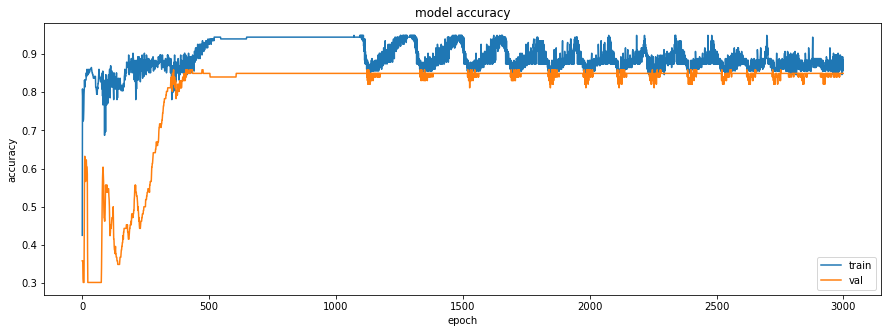

In [70]:
plt.figure(figsize=(15,5))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

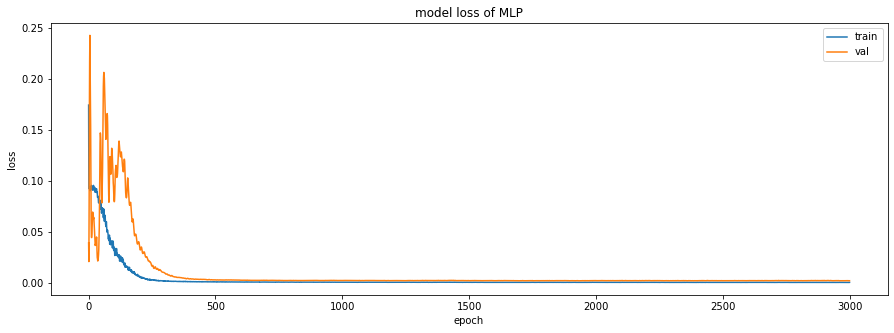

In [10]:
#3 ชั้น
plt.figure(figsize=(15,5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss of MLP')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

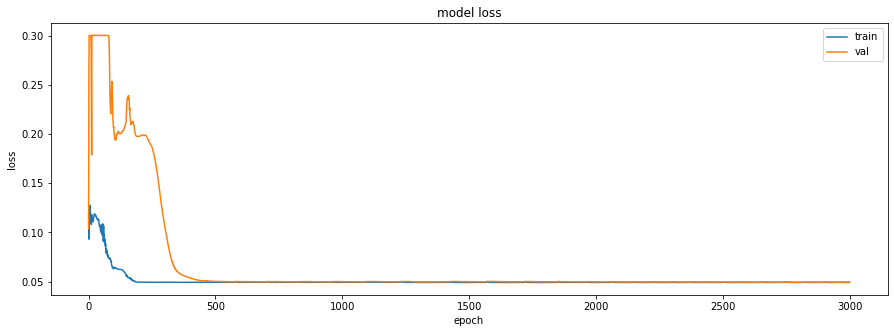

In [58]:
#the best
plt.figure(figsize=(15,5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

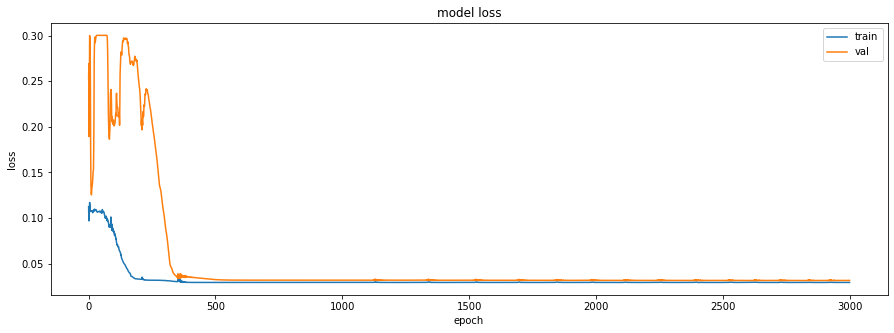

In [73]:
#test2
plt.figure(figsize=(15,5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [33]:
y_pred1 = model1.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
import math
m = mean_squared_error(y_test,y_pred1)
r = math.sqrt(m)
print('MSE = ',m)
print('RMSE = ',r)

MSE =  0.0024840263175733425
RMSE =  0.049840007198768965


In [72]:
from sklearn.metrics import mean_squared_error,r2_score
import math
m = mean_squared_error(y_test,y_pred1)
r = math.sqrt(m)
print('MSE = ',m)
print('RMSE = ',r)

MSE =  0.037406294821175384
RMSE =  0.19340707024608844


In [213]:
from sklearn.metrics import mean_squared_error,r2_score
import math
m = mean_squared_error(y_test,y_pred1)
r = math.sqrt(m)
print('MSE = ',m)
print('RMSE = ',r)

MSE =  0.002274548076509638
RMSE =  0.04769222239013022
